# Импорты и начальная настройка

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Загрузка данных

In [29]:
# Обучающие данные
images = np.load('/content/images.npy')
labels = np.load('/content/labels.npy')

# Тестовые изображения (без меток)
images_sub = np.load('/content/images_sub.npy')

# Анализ и подготовка

Train images shape: (20000, 48, 48, 3)
Labels shape: (20000,)
Submission images shape: (50000, 48, 48, 3)


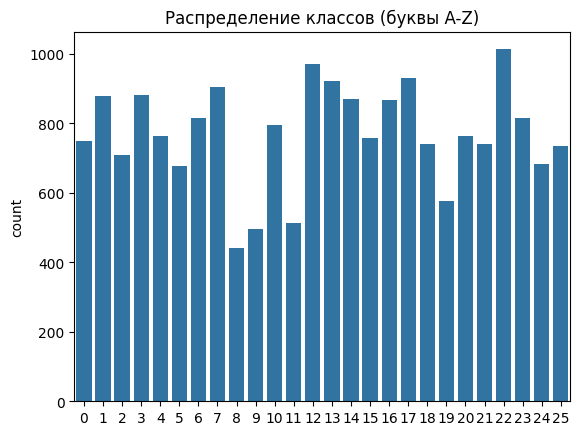

In [30]:
print("Train images shape:", images.shape)
print("Labels shape:", labels.shape)
print("Submission images shape:", images_sub.shape)

# Проверим распределение классов
sns.countplot(x=labels)
plt.title("Распределение классов (буквы A-Z)")
plt.show()

# Предобработка

In [31]:
# Нормализация
images = images.astype('float32') / 255.0
images_sub = images_sub.astype('float32') / 255.0

# One-hot encoding
y_cat = to_categorical(labels, num_classes=26)

# Разделение на train и validation
X_train, X_val, y_train, y_val = train_test_split(
    images, y_cat, test_size=0.15, random_state=42, stratify=labels
)

# Создание модели

In [35]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48, 48, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,287,770 (20.17 MB)

 Trainable params: 5,287,770 (20.17 MB)

 Non-trainable params: 0 (0.00 B)

# Обучение модели

In [36]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=15,
                    batch_size=64,
                    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.0471 - loss: 3.2529 - val_accuracy: 0.1447 - val_loss: 3.0372
Epoch 2/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.1618 - loss: 2.8862 - val_accuracy: 0.4383 - val_loss: 1.9737
Epoch 3/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.4069 - loss: 1.9689 - val_accuracy: 0.6287 - val_loss: 1.3238
Epoch 4/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5430 - loss: 1.4879 - val_accuracy: 0.7257 - val_loss: 1.0253
Epoch 5/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6204 - loss: 1.2266 - val_accuracy: 0.7490 - val_loss: 0.8579
Epoch 6/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6658 - loss: 1.0653 - val_accuracy: 0.7917 - val_loss: 0.7471
Epoch 7/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.6985 - loss: 0.9530 - val_accuracy: 0.8147 - val_loss: 0.6683
Epoch 8/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7231 - loss: 0.8607 - val

# Визуализация обучения

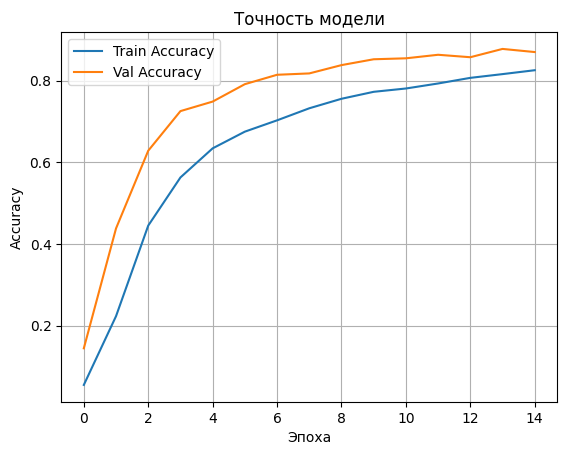

In [37]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Предсказания на сабмит-датасете
images_sub = np.load('/content/images_sub.npy')
images_sub = images_sub / 255.0  # нормализация
preds = model.predict(images_sub)
labels_pred = np.argmax(preds, axis=1)

# Формируем submission DataFrame
submission = pd.DataFrame({
    'Id': np.arange(len(labels_pred)),
    'Category': labels_pred
})

submission.to_csv('submission.csv', index=False)
print("Файл submission.csv успешно сохранен.")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
Файл submission.csv успешно сохранен.
